In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import model, analysis
from common import util
compute = True

In [28]:
import importlib
analysis = importlib.reload(analysis)
model = importlib.reload(model)
compute = True

In [42]:
f_a = 3e14
H_inf = 2e10

## Compare time evolutions for harmonic and cosine potentials

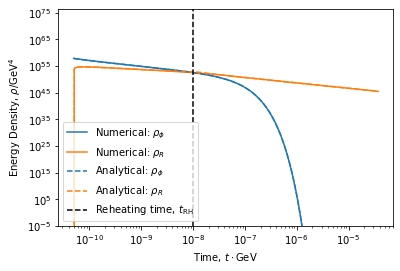

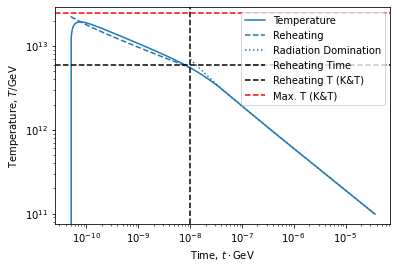

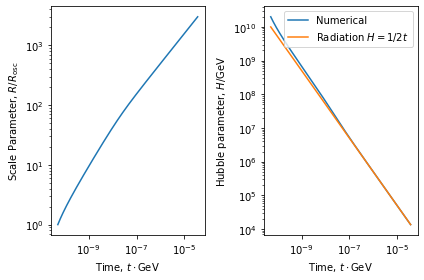

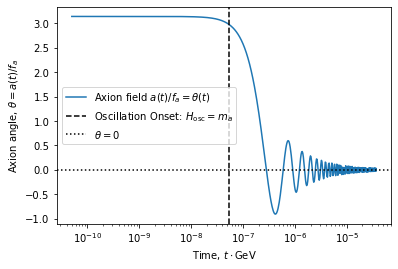

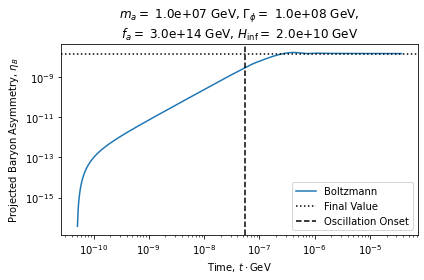

axion oscillations: 58
final asymmetry: 1.4406112346558233e-08


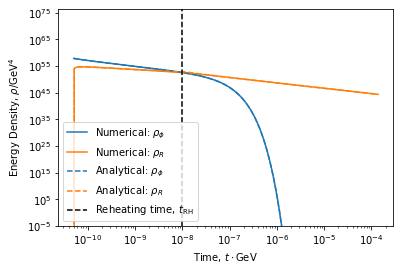

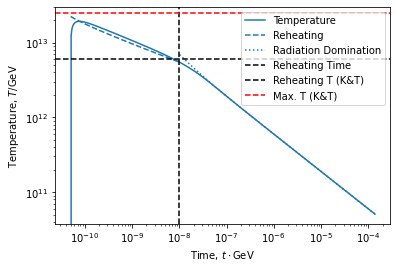

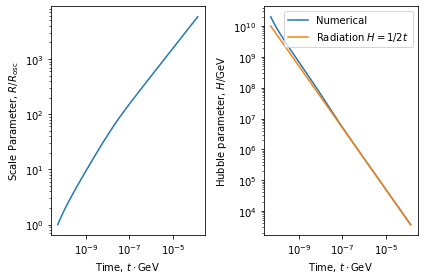

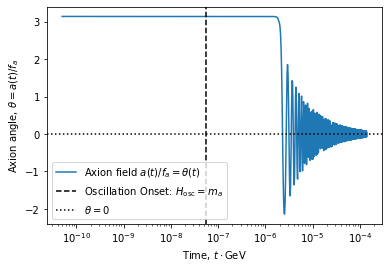

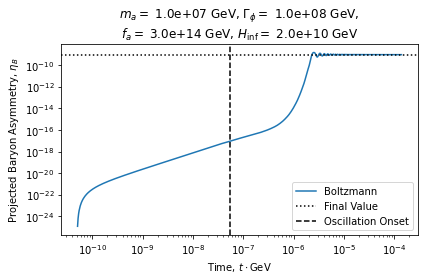

axion oscillations: 215
final asymmetry: 9.203421692767805e-10


In [44]:
theta0 = np.pi - 1e-8
m_a = 1e7
Gamma_phi = 1e8
analysis.make_time_plots(m_a, f_a, Gamma_phi, H_inf, show_all=True, theta0=theta0, use_cosine_potential=False)
analysis.make_time_plots(m_a, f_a, Gamma_phi, H_inf, show_all=True, theta0=theta0, use_cosine_potential=True);

## Contour Plot of the Asymmetry in the Parameter Space for fixed $f_a$

In [47]:
theta0 = np.pi - 1e-2

In [19]:
name = "cosine_eta_B.pkl"

if compute:
    m_a_s, Gamma_phi_s, eta_B_numerical = analysis.sample_parameter_space_numerical(f_a, H_inf, 
        kwargs=dict(bg_kwargs=dict(use_cosine_potential=True, theta0=theta0)))
    util.save_data(name, m_a_s, Gamma_phi_s, eta_B_numerical)
else:
    m_a_s, Gamma_phi_s, eta_B_numerical = util.load_data(name)

/home/jana/Documents/master-project/axion_spg/model.py:265: RuntimeWarning: overflow encountered in exp
  def rhs_axion_decay(log_t, y, Gamma_a):
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: invalid value encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:265: RuntimeWarning: overflow encountered in exp
  def rhs_axion_decay(log_t, y, Gamma_a):
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: invalid value encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: divide by zero encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: overflow encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"


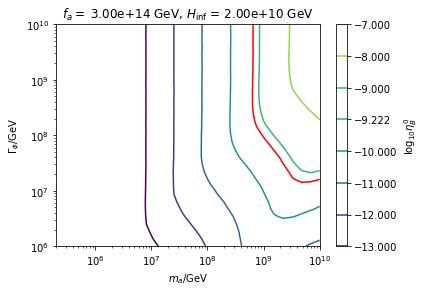

In [45]:
levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))

# numerical result
CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B_numerical), levels=levels)

# labels
plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
plt.tight_layout()
plt.title(f"$f_a =$ {f_a:.2e} GeV, $H_\\mathrm{{inf}}$ = {H_inf:.2e} GeV")
plt.savefig(util.make_plot_path("sbg_leptogenesis_axion_osc_cosine_contour_plot.pdf"))

## Correct Asymmetry as a Function of $f_a$

In [48]:
name = "cosine_curves.pkl"
if compute:
    f_a_list = [3e10, 4e10, 1e13, 1e14, 1e15, 4e15]
    curves = [analysis.compute_correct_curve(f_a, model.calc_H_inf_max(f_a) / 10,
                                            bg_kwargs=dict(theta0=theta0, use_cosine_potential=True)) 
              for f_a in tqdm(f_a_list)]
    util.save_data(name, f_a_list, curves)
else:
    f_a_list, curves = util.load_data(name)

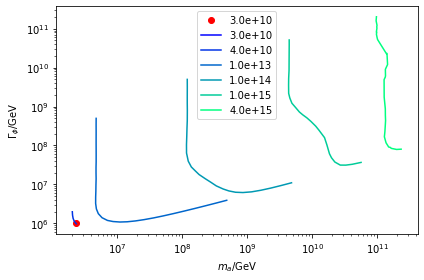

In [49]:
cmap = plt.get_cmap("winter")
for x, f_a, (curve_m_a, curve_Gamma_phi) in zip(np.linspace(0, 1, len(f_a_list)), f_a_list, curves):
    if len(curve_m_a) == 1:
        plt.plot(curve_m_a, curve_Gamma_phi, "or", label=f"{f_a:.1e}")
    plt.plot(curve_m_a, curve_Gamma_phi, color=cmap(x), label=f"{f_a:.1e}")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
#scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(f_a_list), vmax=max(f_a_list)))
#cbar = plt.colorbar(scalar_map)
#cbar.set_label(r"$f_a / \mathrm{GeV}$") # TODO: the colorbar is not correct!!!!
plt.legend()
plt.tight_layout()
plt.savefig(util.make_plot_path("correct_eta_B_curves_cosine.pdf"))

In [55]:
print(f"minimum: m_a = {min(curves[1][0]):e}, Gamma_phi = {min(curves[1][1]):e}")

minimum: m_a = 2.034354e+06, Gamma_phi = 9.667406e+05


## Find the minimal $m_a$ and $\Gamma_\varphi$

In [29]:
minimal_m_a, minimal_Gamma_phi = analysis.find_minimal_m_a_and_Gamma_phi(start_f_a=4e10, f_a_step_factor=2)
print(f"minimal: m_a = {minimal_m_a:e}; Gamma_phi = {minimal_Gamma_phi:e}")

step: 1


/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  return d_log_rho_R_d_log_t, d_log_rho_a_d_log_t, d_log_R_d_log_t
/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  return d_log_rho_R_d_log_t, d_log_rho_a_d_log_t, d_log_R_d_log_t


delta: inf
step: 2


AssertionError: f_a = 20000000000.0